# Trees and Forests

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Decision Tree Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  # doctest: +SKIP
from sklearn.tree import export_graphviz
from scipy.misc import imread
from scipy import ndimage
import os

GRAPHVIS_PATH = r"C:\Program Files (x86)\Graphviz2.38\bin"
if GRAPHVIS_PATH not in os.environ['PATH']:
    os.environ['PATH'] += ";" + GRAPHVIS_PATH

import re

X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=50)


def tree_image(tree, fout=None):
    try:
        import pydot
    except ImportError:
        # make a hacky white plot
        x = np.ones((10, 10))
        x[0, 0] = 0
        return x
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data)
    data = re.sub(r"gini = 0\.[0-9]+\\n", "", dot_data.getvalue())
    data = re.sub(r"samples = [0-9]+\\n", "", data)
    data = re.sub(r"\\nsamples = [0-9]+", "", data)

    graph = pydot.graph_from_dot_data(data)
    if fout is None:
        fout = "tmp.png"
    graph.write_png(fout)
    return imread(fout)


def plot_tree(max_depth=1):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        tree = DecisionTreeClassifier(max_depth=max_depth, random_state=1).fit(X, y)
        Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        faces = tree.tree_.apply(np.c_[xx.ravel(), yy.ravel()].astype(np.float32))
        faces = faces.reshape(xx.shape)
        border = ndimage.laplace(faces) != 0
        ax[0].contourf(xx, yy, Z, alpha=.4)
        ax[0].scatter(xx[border], yy[border], marker='.', s=1)
        ax[0].set_title("max_depth = %d" % max_depth)
        ax[1].imshow(tree_image(tree))
        ax[1].axis("off")
    else:
        ax[0].set_title("data set")
        ax[1].set_visible(False)
    ax[0].scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)
    ax[0].set_xticks(())
    ax[0].set_yticks(())


def plot_tree_interactive():
    from IPython.html.widgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_tree, max_depth=slider)

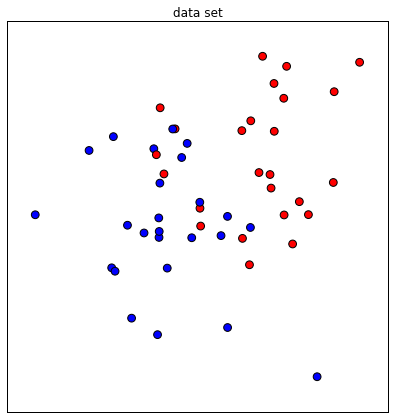

In [3]:
plot_tree_interactive()

# Random Forests (ensemble Decision Trees)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier


X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=50)


def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=20, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from IPython.html.widgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)

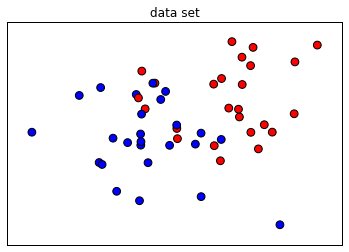

In [5]:
plot_forest_interactive()

# Selecting the Optimal Estimator via Cross-Validation

In [7]:
from sklearn import grid_search
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7, 9]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [8]:
clf_grid.score(X_train, y_train)

1.0

In [9]:
clf_grid.score(X_test, y_test)

0.97555555555555551